In [1]:
!git clone https://github.com/scikit-learn/scikit-learn.git
!pip install scikit-learn
# First we will import the necessary Library

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

fatal: destination path 'scikit-learn' already exists and is not an empty directory.


In [2]:
maindf=pd.read_csv('/content/BTC-USD.csv')

In [3]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  2713
Total number of fields present in the dataset:  7


In [4]:
maindf.shape

(2713, 7)

In [5]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/17/2014,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,9/18/2014,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,9/19/2014,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,9/20/2014,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,9/21/2014,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [6]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2708,2/15/2022,42586.46484,44667.21875,42491.03516,44575.20313,44575.20313,2.272166e+10
2709,2/16/2022,44578.27734,44578.27734,43456.69141,43961.85938,43961.85938,1.979255e+10
2710,2/17/2022,43937.07031,44132.97266,40249.37109,40538.01172,40538.01172,2.624666e+10
2711,2/18/2022,40552.13281,40929.15234,39637.61719,40030.97656,40030.97656,2.331001e+10
2712,2/19/2022,40022.13281,40246.02734,40010.86719,40126.42969,40126.42969,2.226390e+10


In [7]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   float64
dtypes: float64(6), object(1)
memory usage: 148.5+ KB


In [8]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555058,11323.914637,11323.914637,1.470462e+10
std,16106.428892,16537.390649,15608.572561,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399410,10762.644530,10202.387700,10462.259770,10462.259770,2.456992e+10
max,67549.734380,68789.625000,66382.062500,67566.828130,67566.828130,3.509680e+11


In [9]:
print('Null Values:',maindf.isnull().values.sum())
print('NA values:',maindf.isnull().values.any())

Null Values: 0
NA values: False


In [10]:
sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 9/17/2014
Ending Date 2/19/2022


In [11]:
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2713, 2)


In [12]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2022', plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [13]:
closedf = closedf[closedf['Date'] > '2015-02-19']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  1512


In [14]:
closedf

,Date,Close
0,9/17/2014,457.334015
1,9/18/2014,424.440002
2,9/19/2014,394.795990
3,9/20/2014,408.903992
4,9/21/2014,398.821014
...,...,...
2566,9/26/2021,43208.539060
2567,9/27/2021,42235.730470
2568,9/28/2021,41034.542970
2569,9/29/2021,41564.363280


In [15]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price',
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [16]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1512, 1)


In [17]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (907, 1)
test_data:  (605, 1)


In [18]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [19]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (891, 15)
y_train:  (891,)
X_test:  (589, 15)
y_test (589,)


In [20]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (891, 15, 1)
X_test:  (589, 15, 1)


In [21]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [22]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
28/28 [==============================] - 2s 22ms/step - loss: 0.0028 - val_loss: 0.1662
Epoch 2/200
28/28 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 0.1355
Epoch 3/200
28/28 [==============================] - 0s 13ms/step - loss: 7.9311e-04 - val_loss: 0.1067
Epoch 4/200
28/28 [==============================] - 0s 12ms/step - loss: 4.1089e-04 - val_loss: 0.0649
Epoch 5/200
28/28 [==============================] - 0s 11ms/step - loss: 1.3827e-04 - val_loss: 0.0282
Epoch 6/200
28/28 [==============================] - 0s 10ms/step - loss: 7.7902e-05 - val_loss: 0.0212
Epoch 7/200
28/28 [==============================] - 0s 10ms/step - loss: 7.5138e-05 - val_loss: 0.0219
Epoch 8/200
28/28 [==============================] - 0s 11ms/step - loss: 7.5261e-05 - val_loss: 0.0209
Epoch 9/200
28/28 [==============================] - 0s 10ms/step - loss: 7.2793e-05 - val_loss: 0.0206
Epoch 10/200
28/28 [==============================] - 0s 12ms/step - los

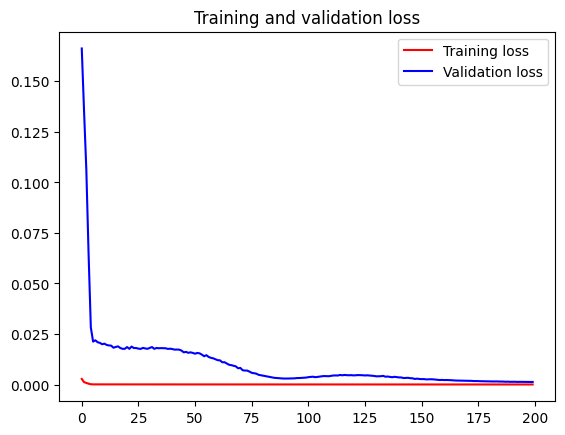

<Figure size 640x480 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [24]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

19/19 [==============================] - 0s 4ms/step


((891, 1), (589, 1))

In [25]:

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [26]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  312.4558628344059
Train data MSE:  97628.66621959305
Train data MAE:  112.09384602751253
-------------------------------------------------------------------------------------
Test data RMSE:  2262.057802555969
Test data MSE:  5116905.502104339
Test data MAE:  958.8826789195671


In [27]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9891658804470653
Test data explained variance regression score: 0.9849959706588172


In [28]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9890708178416565
Test data R2 score: 0.9849502592616682


In [29]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.00602418786729561
Test data MGD:  0.010111862609026155
----------------------------------------------------------------------
Train data MPD:  17.153416761133705
Test data MPD:  194.20742063010826


In [30]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1512, 1)
Test predicted data:  (1512, 1)


In [31]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [32]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [33]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [34]:
rnndf=closedf.tolist()
rnndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rnndf=scaler.inverse_transform(rnndf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rnndf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [35]:
import numpy as np

# Assuming you have 'original_close' in plotdf
original_close = plotdf['original_close']

# Generate synthetic open, high, and low values
original_open = original_close.shift(1)  # Use the previous close as the open
original_high = original_close.max()  # Use the maximum close value as the high
original_low = original_close.min()  # Use the minimum close value as the low

# Create a new DataFrame with open, high, low, and close values
candlestick_data = pd.DataFrame({
    'date': plotdf['date'],
    'open': original_open,
    'high': original_high,
    'low': original_low,
    'close': original_close
})

# Now you can use the 'candlestick_data' DataFrame to create the candlestick chart.


In [36]:
import plotly.graph_objects as go

# Create a Candlestick trace for the original data
trace = go.Candlestick(
    x=candlestick_data['date'],
    open=candlestick_data['open'],
    high=candlestick_data['high'],
    low=candlestick_data['low'],
    close=candlestick_data['close'],
    name='Original Candlestick'
)

# Create a layout for the candlestick chart
layout = go.Layout(
    title='Candlestick Chart for Original Data',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=True
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Show the figure
fig.show()


In [37]:
import plotly.graph_objects as go

# Downsampling the data for better visibility (e.g., every 10th data point)
downsampled_data = candlestick_data.iloc[::100]  # Adjust the downsample factor as needed

# Create a Candlestick trace for the downsampled data
trace = go.Candlestick(
    x=downsampled_data['date'],
    open=downsampled_data['open'],
    high=downsampled_data['high'],
    low=downsampled_data['low'],
    close=downsampled_data['close'],
    name='Original Candlestick'
)

# Create a layout for the candlestick chart
layout = go.Layout(
    title='Candlestick Chart for Downsampled Original Data',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=True
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Show the figure
fig.show()
